In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# 进行内容预测,我给定theta和x,通过sigmoid函数预测结果是偏向于0还是偏向于1
def predict(x,theta):
    exp_sup=np.dot(x,theta)
    return 1/(1+np.exp(-exp_sup))

def loadData(path):
    datas=pd.read_csv(path)
    data_ay=np.array(datas)
    x=data_ay[:,0:-1]
    y=np.array(data_ay[:,-1])  # 由于y是分类标签,因此通过bool类型标识更加好用
    maxX=np.max(x,axis=0)
    minX=np.min(x,axis=0)
    meanX=np.mean(x,axis=0)
    x=(x-meanX)/(maxX-minX)
    return x,y

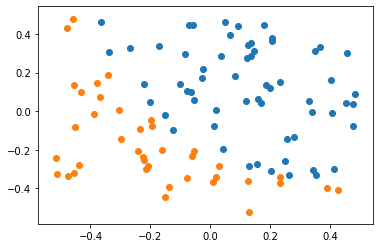

In [3]:
x,t=loadData('ex2data1.txt')
# 将数据分为录取数据pos和未录取数据neg
pos=x[t==1]
neg=x[t==0]
plt.scatter(pos[:,0],pos[:,1])
plt.scatter(neg[:,0],neg[:,1])

In [4]:
def costFunc(theta,x,t):
    batch_size=t.shape[0]
    delta=1e-8

    t1=1-t
    y_hat=predict(x=x,theta=theta)
    x1=np.log(y_hat)
    x2=np.log(1-y_hat)
    return -(np.dot(t,x1)+np.dot(t1,x2))/batch_size

def dCost(theta,x,t):
    batch_size=t.shape[0]
    
    y_hat=predict(x=x,theta=theta)
    diff=y_hat-t
    return np.dot(diff,x)/batch_size

def gradient_descent(x,theta,t,alpha,maxIters,delta=1e-6):
    hist_cost=[]
    hist_theta=[]
    for i in range(maxIters):
        pre_theta=theta
        right=dCost(theta,x,t)
        theta=theta-alpha*right
        
        cost=costFunc(theta,x,t)
        hist_cost.append(cost)
        hist_theta.append(theta)
#         if i%100==50:
#             if abs(hist_cost[-1]-hist_cost[-2])<delta:
#                 break
    return theta,np.array(hist_cost),i+1

In [5]:
def showPredict(x,theta):
    y=predict(x,theta)
    print(y)
    y=np.floor(y+0.5)
    pos=x[y==0]
    neg=x[y==1]
    plt.scatter(pos[:,0],pos[:,1])
    plt.scatter(neg[:,0],neg[:,1])

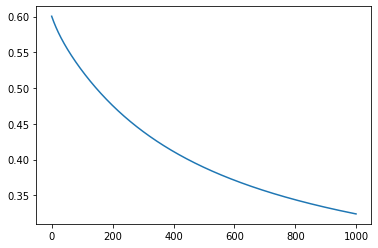

In [6]:
init_theta=np.random.rand(3)
ones=np.zeros(x.shape[0])+1
x_with_1=np.column_stack([ones,x])

iter_cnt=1000
alpha=0.1
final_theta,costs,iter_cnt=gradient_descent(x_with_1,init_theta,t,alpha,iter_cnt)

plt.plot(np.arange(iter_cnt),costs)


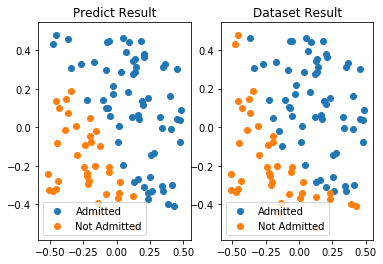

In [7]:
# 最后还是打算画出我们的分界线
y_hat=predict(x=x_with_1,theta=final_theta)
plt.subplot(1,2,1)
pre_pos=x[y_hat>=0.5]
pre_neg=x[y_hat<=0.5]
t1=plt.scatter(pre_pos[:,0],pre_pos[:,1])
t2=plt.scatter(pre_neg[:,0],pre_neg[:,1])
plt.title("Predict Result")
plt.legend((t1,t2),('Admitted','Not Admitted'))

plt.subplot(1,2,2)
t3=plt.scatter(pos[:,0],pos[:,1],)
t4=plt.scatter(neg[:,0],neg[:,1])
plt.title("Dataset Result")
plt.legend((t3,t4),('Admitted','Not Admitted'))